1. Work Process

1) Data Collection
- Total nine variables: Macro (ip, US and EU money),index (DJIA), currency (Norway Krona (inverse included), Euro), Coal price, US interest rate (10Yr)

2) Preprocessing
- ARIMA: Stationarity, Residual, p.d.q
- LSTM: Training-Test Split, validation

3) Model Selection
- ARIMA, ML. DL

4) Evaluation
a. ARIMA:  
 - MSE: 1907.437516093254
 - MAE: 1400.4750000000004
 - MAPE: 0.04530564449162539

b. LSTM
 - MSE: 2203.1874311174174
 - MAE: 1569.380260416665
 - MAPE: 0.05147524072407283

5) Result
 To compare the performance of ARIMA and LSTM shows that of ARIMA is slightly better than LSTM with eight valriables with indicators like MSE, MAE, and MAPE. 
ARIMA has accuracy of 95.5% and LSTM 94.9% with 1907 and 2203 of MSE each. 

2. Blog address
 https://github.com/pangsoo/midterm.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from google.colab import drive
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import math
import time
import datetime

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
url = "https://raw.githubusercontent.com/pangsoo/midterm/main/middata.csv"
df = pd.read_csv(url)
df

,date,dji,eur,10yr_R,eu_money,us_money,ip,coal,nok,usd-nok
0,2010-01,"10,067.33",1.3863,3.588,1155,1995.0,89.1936,95.30,5.9270,0.168719
1,2010-02,"10,325.26",1.3626,3.619,1163,2115.2,89.5089,93.85,5.9058,0.169325
2,2010-03,"10,856.63",1.3512,3.833,1183,2079.6,90.1449,94.95,5.9395,0.168364
3,2010-04,"11,008.61",1.3298,3.659,1206,2014.4,90.4740,103.85,5.9060,0.169319
4,2010-05,"10,136.63",1.2306,3.303,1227,2012.3,91.7131,100.20,6.4550,0.154919
...,...,...,...,...,...,...,...,...,...,...
152,2022-09,"28,730.12",0.9799,3.829,6228,5410.9,104.5740,433.70,10.8821,0.091894
153,2022-10,"32,734.40",0.9883,4.050,6307,5339.6,104.5927,356.30,10.3835,0.096307
154,2022-11,"34,587.46",1.0405,3.611,6386,5418.7,103.9846,397.00,9.8382,0.101645
155,2022-12,"33,147.28",1.0702,3.879,6296,5405.4,102.9256,404.15,9.7965,0.102077


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      157 non-null    object 
 1   dji       157 non-null    object 
 2   eur       157 non-null    float64
 3   10yr_R    157 non-null    float64
 4   eu_money  157 non-null    int64  
 5   us_money  157 non-null    float64
 6   ip        157 non-null    float64
 7   coal      157 non-null    float64
 8   nok       157 non-null    float64
 9   usd-nok   157 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.4+ KB


In [4]:
# Conver to the time series
# Set index as time

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m')
df.index = df['date']
df.set_index('date', inplace = True)


In [5]:
df['dji'] = df['dji'].str.replace(',', '').astype(float)
df.head()

,dji,eur,10yr_R,eu_money,us_money,ip,coal,nok,usd-nok
date,,,,,,,,,
2010-01-01,10067.33,1.3863,3.588,1155,1995.0,89.1936,95.30,5.9270,0.168719
2010-02-01,10325.26,1.3626,3.619,1163,2115.2,89.5089,93.85,5.9058,0.169325
2010-03-01,10856.63,1.3512,3.833,1183,2079.6,90.1449,94.95,5.9395,0.168364
2010-04-01,11008.61,1.3298,3.659,1206,2014.4,90.4740,103.85,5.9060,0.169319
2010-05-01,10136.63,1.2306,3.303,1227,2012.3,91.7131,100.20,6.4550,0.154919


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2010-01-01 to 2023-01-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dji       157 non-null    float64
 1   eur       157 non-null    float64
 2   10yr_R    157 non-null    float64
 3   eu_money  157 non-null    int64  
 4   us_money  157 non-null    float64
 5   ip        157 non-null    float64
 6   coal      157 non-null    float64
 7   nok       157 non-null    float64
 8   usd-nok   157 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 12.3 KB


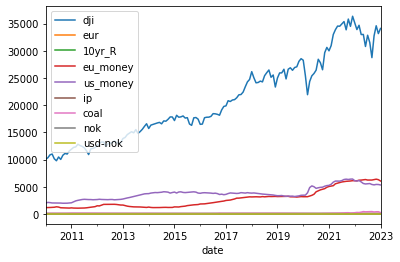

In [7]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

In [8]:
stock = df.iloc[:, [0]]
stock.tail()

,dji
date,
2022-09-01,28730.12
2022-10-01,32734.40
2022-11-01,34587.46
2022-12-01,33147.28
2023-01-01,34086.89


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2010-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dji     157 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [10]:
# ADF check

from statsmodels.tsa.stattools import adfuller

stock_diff1 = stock.diff().dropna()['dji']
result = adfuller(stock)

print(f'Orginal ADF Stat: {result[0]: .3f}')
print(f'Orginal p-value: {result[1]: .3f}')

result = adfuller(stock_diff1)
print(f'1st Diff ADF Stat: {result[0]: .3f}')
print(f'1st Diff p-value: {result[1]: .3f}') # P-value indicating 1st diff is stationary

Orginal ADF Stat: -0.332
Orginal p-value:  0.921
1st Diff ADF Stat: -4.294
1st Diff p-value:  0.000


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:xlabel='date'>

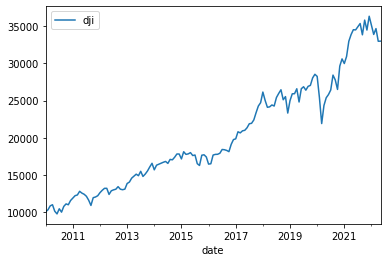

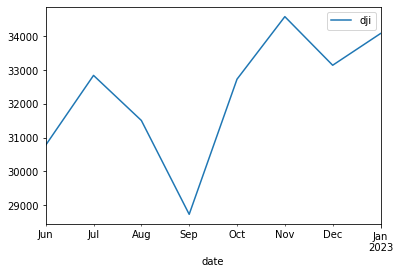

In [18]:
!pip install pmdarima
from pmdarima.arima import ndiffs
import pmdarima as pm

stock_train = stock[:int(0.95*len(stock))]
stock_test = stock[int(0.95*len(stock)):]
stock_train.plot()
stock_test.plot()

In [19]:
print(stock_train.shape)
stock_test.head()

(149, 1)


,dji
date,
2022-06-01,30779.71
2022-07-01,32846.45
2022-08-01,31511.09
2022-09-01,28730.12
2022-10-01,32734.40


In [20]:
model = pm.auto_arima(y = stock_train,
                      d=1,
                      start_p = 0,
                      max_p = 3,
                      start_q = 0,
                      max_q = 3,
                      m =1,
                      seasonal=False,
                      stepwise = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2432.255, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2432.727, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2432.545, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2434.733, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.580 seconds


In [21]:
model = pm.auto_arima (stock_train, d = 1, seasonal = False, trace = True)
model.fit(stock_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2432.255, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2432.727, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2432.545, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2434.733, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.328 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [22]:
model = ARIMA(stock_train, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Prob(Q) = 0.16 > 0.05 then we can decide the residual is white noise

                               SARIMAX Results                                
Dep. Variable:                    dji   No. Observations:                  149
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1216.366
Date:                Sun, 12 Mar 2023   AIC                           2434.733
Time:                        15:01:07   BIC                           2437.730
Sample:                    01-01-2010   HQIC                          2435.950
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.003e+05   6.23e+04     12.854      0.000    6.78e+05    9.22e+05
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):                58.70
Prob(Q):                              0.16   Pr

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


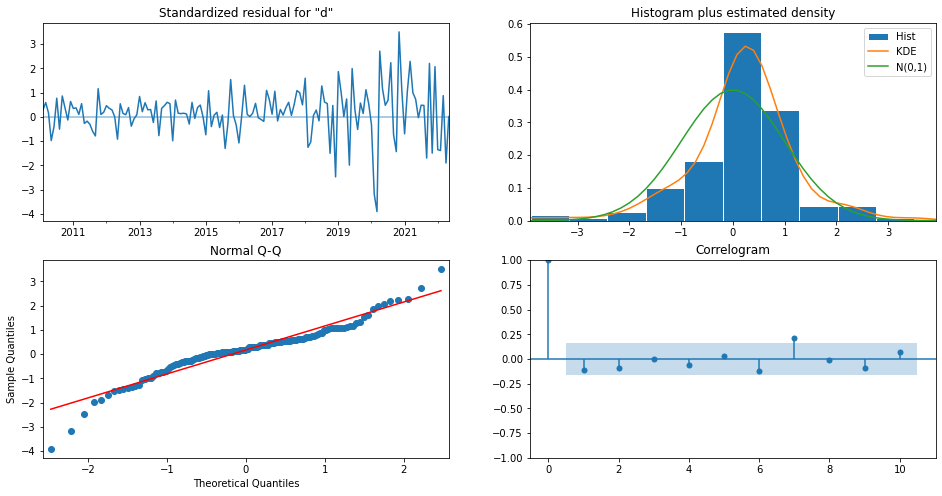

In [23]:
model_fit.plot_diagnostics(figsize = (16,8))
plt.show()

In [24]:
predict = model_fit.predict(n_periods = len(stock_test))
predict

2010-01-01        0.00
2010-02-01    10067.33
2010-03-01    10325.26
2010-04-01    10856.63
2010-05-01    11008.61
                ...   
2022-01-01    36338.30
2022-02-01    35131.86
2022-03-01    33892.60
2022-04-01    34678.35
2022-05-01    32977.21
Freq: MS, Name: predicted_mean, Length: 149, dtype: float64

In [25]:
print(stock_train)

                 dji
date                
2010-01-01  10067.33
2010-02-01  10325.26
2010-03-01  10856.63
2010-04-01  11008.61
2010-05-01  10136.63
...              ...
2022-01-01  35131.86
2022-02-01  33892.60
2022-03-01  34678.35
2022-04-01  32977.21
2022-05-01  32991.97

[149 rows x 1 columns]


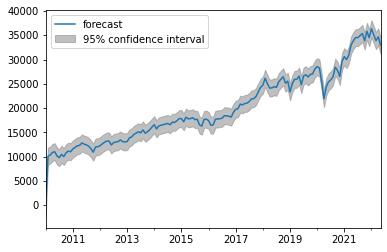

In [26]:
plot_predict(model_fit, dynamic=False)
plt.show()

In [27]:
forecast = model_fit.forecast(steps = len(stock_test))
forecast

2022-06-01    32991.97
2022-07-01    32991.97
2022-08-01    32991.97
2022-09-01    32991.97
2022-10-01    32991.97
2022-11-01    32991.97
2022-12-01    32991.97
2023-01-01    32991.97
Freq: MS, Name: predicted_mean, dtype: float64

In [28]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['dji_forecast']
df_forecast

,dji_forecast
2022-06-01,32991.97
2022-07-01,32991.97
2022-08-01,32991.97
2022-09-01,32991.97
2022-10-01,32991.97
2022-11-01,32991.97
2022-12-01,32991.97
2023-01-01,32991.97


In [29]:
compare = pd.merge(stock_test, df_forecast, how='inner', left_index = True, right_index=True)
compare.head() # The forecast is explaied flat because the trend of the recent months remain silent

,dji,dji_forecast
date,,
2022-06-01,30779.71,32991.97
2022-07-01,32846.45,32991.97
2022-08-01,31511.09,32991.97
2022-09-01,28730.12,32991.97
2022-10-01,32734.40,32991.97


In [54]:
# Performance
mse_arima = mean_squared_error(stock_test['dji'].values, forecast.values, squared=False)
print('MSE: '+str(mse_arima))
mae_arima = mean_absolute_error(stock_test['dji'].values, forecast.values)
print('MAE: '+str(mae_arima))
mape_arima = np.mean(np.abs(compare['dji_forecast'] - compare['dji'])/np.abs(compare['dji']))
print('MAPE: '+str(mape_arima)) # 4.5% of absolute gap


MSE: 1907.437516093254
MAE: 1400.4750000000004
MAPE: 0.04530564449162539


**Stock Forecast with LSTM**

In [12]:
!pip install seaborn
!pip install tensor
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearm.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.3 MB/s eta 0:00:00


In [274]:
url = "https://raw.githubusercontent.com/pangsoo/midterm/main/middata.csv"
df = pd.read_csv(url)
print(df.head())

      date        dji     eur  10yr_R  eu_money  us_money       ip    coal  \
0  2010-01  10,067.33  1.3863   3.588      1155    1995.0  89.1936   95.30   
1  2010-02  10,325.26  1.3626   3.619      1163    2115.2  89.5089   93.85   
2  2010-03  10,856.63  1.3512   3.833      1183    2079.6  90.1449   94.95   
3  2010-04  11,008.61  1.3298   3.659      1206    2014.4  90.4740  103.85   
4  2010-05  10,136.63  1.2306   3.303      1227    2012.3  91.7131  100.20   

      nok   usd-nok  
0  5.9270  0.168719  
1  5.9058  0.169325  
2  5.9395  0.168364  
3  5.9060  0.169319  
4  6.4550  0.154919  


In [275]:
df = df.drop(columns = ['date'])
df['dji'] = df['dji'].str.replace(',', '').astype(float)
df.head()

,dji,eur,10yr_R,eu_money,us_money,ip,coal,nok,usd-nok
0,10067.33,1.3863,3.588,1155,1995.0,89.1936,95.30,5.9270,0.168719
1,10325.26,1.3626,3.619,1163,2115.2,89.5089,93.85,5.9058,0.169325
2,10856.63,1.3512,3.833,1183,2079.6,90.1449,94.95,5.9395,0.168364
3,11008.61,1.3298,3.659,1206,2014.4,90.4740,103.85,5.9060,0.169319
4,10136.63,1.2306,3.303,1227,2012.3,91.7131,100.20,6.4550,0.154919


In [276]:
# setting Target 

target_list = ['dji', 'eur']
target = target_list[0]

lag = 6
WINDOW_SIZE= 6  # reading 6mo in order to forecast 6mo 

def make_dataset(data, label, window_size = WINDOW_SIZE):
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)

In [277]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mini = min(df[target])
maxi = max(df[target])
scale = maxi - mini

scaled = scaler.fit_transform(df)
columns = df.columns
df = pd.DataFrame(scaled, columns = columns)
df.tail()

,dji,eur,10yr_R,eu_money,us_money,ip,coal,nok,usd-nok
152,0.713594,0.0000,0.937162,0.970345,0.774883,0.999048,1.000000,1.000000,0.000000
153,0.864333,0.0168,1.000000,0.985173,0.758867,1.000000,0.798909,0.911525,0.044705
154,0.934090,0.1212,0.875178,1.000000,0.776635,0.969028,0.904651,0.814764,0.098784
155,0.879876,0.1806,0.951379,0.983108,0.773647,0.915090,0.923227,0.807364,0.103168
156,0.915247,0.2124,0.846460,0.937688,0.756351,0.916460,0.527280,0.840742,0.083685


Text(0, 0.5, 'index')

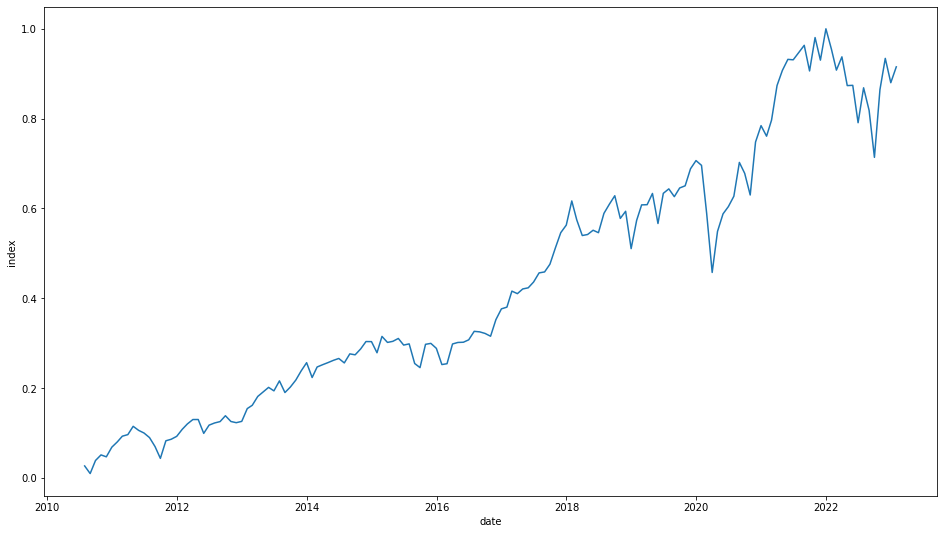

In [278]:
y = df.loc[:, df.columns == target][lag:]
x = df.loc[:, df.columns != target][:-lag]
test = df.loc[:, df.columns != target][-(lag + WINDOW_SIZE):]

rng = pd.date_range('2010-07-01', periods = len(y), freq = 'M')
y.index = rng
x.index = rng

df = pd.concat([y,x], axis = 1)

plt.figure(figsize = (16,9))
sns.lineplot(y=df[target], x = df.index)
plt.xlabel('date')
plt.ylabel('index')

In [279]:
n_train = int(len(df) * 0.85)
train = df
n_train

128

In [280]:
from sklearn.model_selection import train_test_split

feature_cols = x.columns
label_cols = y.columns

train_feature = x
train_label = y

train_feature, train_label = make_dataset(train_feature, train_label, 6)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = len(test))
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((133, 6, 8), (12, 6, 8), (133, 1), (12, 1))

In [281]:
np.shape(test)

(12, 8)

In [282]:
np.shape(train)

(151, 9)

In [283]:
test_feature = test
test_label = pd.DataFrame([np.nan] * len(test_feature))

test_feature.shape, test_label.shape

((12, 8), (12, 1))

In [284]:
test_feature, test_label = make_dataset(test_feature, test_label, 6)
test_feature.shape, test_label.shape

((6, 6, 8), (6, 1))

**Model**

In [285]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda,Dropout, Flatten
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(LSTM(units=256, return_sequences=True, activation='tanh', input_shape = (train_feature.shape[1], train_feature.shape[2])))
model.add(LSTM(units=64, return_sequences=True, activation='tanh'))
model.add(LSTM(units=32, activation = 'tanh'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 6, 256)            271360    
                                                                 
 lstm_34 (LSTM)              (None, 6, 64)             82176     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 365,985
Trainable params: 365,985
Non-trainable params: 0
_________________________________________________________________


In [286]:
# Using Huber() of which performance is good for Sequence

loss = Huber()
optimizer = tf.keras.optimizers.SGD(momentum = 0.9)
model.compile(loss=Huber(), optimizer = optimizer, metrics = ['mae'])

In [287]:
# Stop learning if val_loss is not improved in ten epochs with earlystopping

earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)

# Checkpointer created on val_loss

filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss',
                             verbose = 1)


In [288]:
history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    epochs = 1000,
                    callbacks = [checkpoint, earlystopping])

Epoch 1/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1226 - mae: 0.4155
Epoch 1: val_loss improved from inf to 0.08698, saving model to tmp/checkpointer.ckpt
5/5 [==============================] - 11s 440ms/step - loss: 0.1250 - mae: 0.4207 - val_loss: 0.0870 - val_mae: 0.3322
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 0.0666 - mae: 0.2802
Epoch 2: val_loss improved from 0.08698 to 0.03488, saving model to tmp/checkpointer.ckpt
5/5 [==============================] - 0s 60ms/step - loss: 0.0666 - mae: 0.2802 - val_loss: 0.0349 - val_mae: 0.2140
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 0.0370 - mae: 0.2373
Epoch 3: val_loss improved from 0.03488 to 0.03372, saving model to tmp/checkpointer.ckpt
5/5 [==============================] - 0s 61ms/step - loss: 0.0370 - mae: 0.2373 - val_loss: 0.0337 - val_mae: 0.2270
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 0.0434 - mae: 0.2558
Epoch 4: val_loss did 

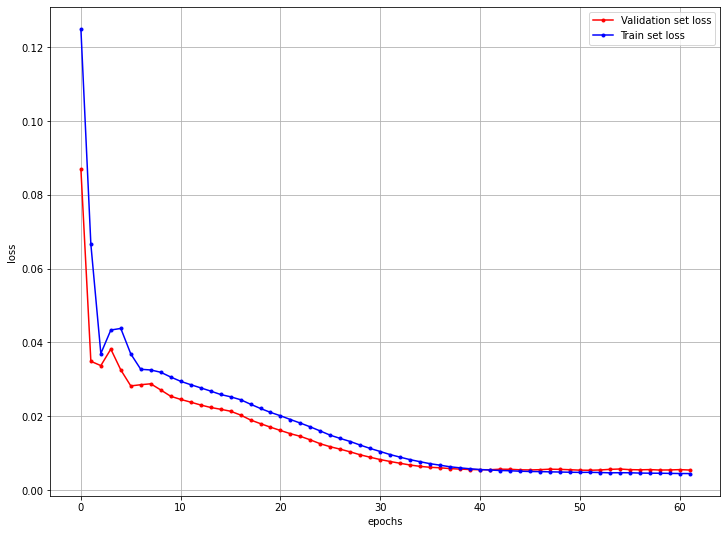

In [289]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.figure(figsize=(12,9))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Validation set loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Train set loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [290]:
model.load_weights(filename)

In [291]:
pred = model.predict(test_feature)

1/1 [==============================] - 2s 2s/step


In [292]:
empty = np.empty((len(y)-1,1))
empty[:] = np.nan

In [293]:
df = pd.DataFrame(scaler.inverse_transform(scaled), columns = columns)
y = df.loc[:, df.columns == target][lag:]
y.index = rng

In [294]:
pred = pred * scale + mini
pred

array([[33385.805],
       [33535.914],
       [33788.97 ],
       [33938.11 ],
       [34136.42 ],
       [34129.6  ]], dtype=float32)

In [312]:
pred1=pd.DataFrame(pred)
pred1.columns = ['dji_pred']
pred1

,dji_pred
0,33385.804688
1,33535.914062
2,33788.968750
3,33938.109375
4,34136.421875
5,34129.601562


In [300]:
actual1 = y.iloc[-6:]
actual1

,dji
2022-08-31,31511.09
2022-09-30,28730.12
2022-10-31,32734.40
2022-11-30,34587.46
2022-12-31,33147.28
2023-01-31,34086.89


In [314]:
# Performance
from sklearn.metrics import mean_squared_error

mse_arima = mean_squared_error(actual1['dji'].values, pred1['dji_pred'].values, squared=False)
print('MSE: '+str(mse_arima))
mae_arima = mean_absolute_error(actual1['dji'].values, pred1['dji_pred'].values)
print('MAE: '+str(mae_arima))
mape_arima = np.mean(np.abs(actual1['dji'].values - pred1['dji_pred'].values)/np.abs(actual1['dji'].values))
print('MAPE: '+str(mape_arima)) # 4.5% of absolute gap

MSE: 2203.1874311174174
MAE: 1569.380260416665
MAPE: 0.05147524072407283
